In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001


def load_images(directory):
    images = []
    labels = []
    label_mapping = {'fractured': 1, 'non_fractured': 0}  
    for label in os.listdir(directory):
        if label in label_mapping:
            label_id = label_mapping[label]  
            label_path = os.path.join(directory, label)
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, IMAGE_SIZE)
                image = image.astype('float32') / 255.0 
                images.append(image)
                labels.append(label_id) 
    return np.array(images), np.array(labels)




data_directory = r'C:\Users\harsh\Desktop\Projects\Machine Learning\Bone Fracture Detection\Dataset\train'
images, labels = load_images(data_directory)


train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))



Epoch 1/20


112/112 [==============================] - 325s 3s/step - loss: 0.0065 - accuracy: 0.9911 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
112/112 [==============================] - 334s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
112/112 [==============================] - 312s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
112/112 [==============================] - 358s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
112/112 [==============================] - 334s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
112/112 [==============================] - 104s 931ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
112/112 [==============================] - 143s 1s/step - loss: 0.0000e+00 - acc

In [3]:
from tensorflow.keras.models import save_model

model.save('my_model.h5')


C:\Users\harsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 133ms/step
Predicted Class: Not Fractured
Confidence: 1.0


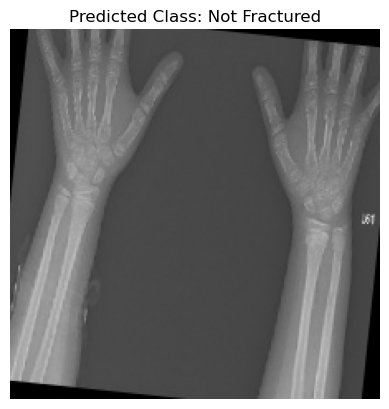

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model = load_model('my_model.h5')  


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  
    image = image.astype('float32') / 255.0 
    return image


class_labels = ['Not Fractured', 'Fractured']


def predict_image(image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  


    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    return class_labels[predicted_class], confidence


image_path = r'C:\Users\harsh\Desktop\Projects\Machine Learning\Bone Fracture Detection\Dataset\train\fractured\10-rotated1.jpg'


predicted_class, confidence = predict_image(image_path)


print('Predicted Class:', predicted_class)
print('Confidence:', confidence)


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

plt.imshow(image)
plt.title('Predicted Class: ' + predicted_class)
plt.axis('off')
plt.show()
